# Plot interpolation test results

### Import modules

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import interpolate as interp
import numpy as np

In [2]:
%matplotlib widget
%config InlineBackend.figure_format = 'retina'

In [3]:
mpl.rcParams['figure.dpi'] = 100

In [4]:
data = np.loadtxt("scvh_hhe_y0.275_dt_cgs_lowrhot.csv", delimiter=",", skiprows=0) 

logT_table   = data[:, 0] 
logrho_table = data[:, 1]
logP_table   = data[:, 2]
logu_table   = data[:, 3]
logs_table   = data[:, 4]

# All SCVH EOS tables obtained from Ravit have the same size
#nRho = 201
#nT   = 100
nRho = 80
nT   = 49

logrho_table = logrho_table[0:nRho]
logT_table = logT_table[0:np.size(logT_table):nRho]

logrho_min = np.min(logrho_table)
logrho_max = np.max(logrho_table)
logT_min   = np.min(logT_table)
logT_max   = np.max(logT_table)
    
dlogrho = logrho_table[1:]-logrho_table[:-1]
dlogT = logT_table[1:]-logT_table[:-1]

print("logrho_min = {:}".format(logrho_min))
print("logrho_max = {:}".format(logrho_max))
print("logT_min   = {:}".format(logT_min))
print("logT_max   = {:}".format(logT_max))
print()
#print("logrho_table = {:}".format(logrho_table))
#print("logT_table   = {:}".format(logT_table))
#print()

# Mark where the original SCvH EOS table was extended below T=100K
index = np.min(np.where(logT_table>=2.0))
print("The EOS table was extended until index={:} logT={:}".format(index, logT_table[index]))

# Split into arrays of constant T
logP_array = np.split(logP_table, nT)
logu_array = np.split(logu_table, nT)
logs_array = np.split(logs_table, nT)

# Generate 2d arrays
logP = np.vstack(logP_array)
logu = np.vstack(logu_array)
logs = np.vstack(logs_array)

logrho_min = -8.0
logrho_max = -4.05
logT_min   = 1.06
logT_max   = 3.46

The EOS table was extended until index=19 logT=2.01


In [5]:
# Load interpolated values
logrho_int = np.loadtxt("testscvheosinterp_rhoaxis.txt")
logT_int = np.loadtxt("testscvheosinterp_taxis.txt")

logP_int = np.loadtxt("testscvheosinterp_logpress.txt")
logu_int = np.loadtxt("testscvheosinterp_intenergy.txt")
logs_int = np.loadtxt("testscvheosinterp_entropy.txt")

nRho_int = np.size(logrho_int)
nT_int = np.size(logT_int)

print("nRho_int= {:} nT_int= {:}".format(nRho_int, nT_int))

print(logrho_table)
print(logrho_int)

print(logrho_table.shape)
print(logrho_int.shape)
print(logP_int.shape)



nRho_int= 159 nT_int= 97
[-8.   -7.95 -7.9  -7.85 -7.8  -7.75 -7.7  -7.65 -7.6  -7.55 -7.5  -7.45
 -7.4  -7.35 -7.3  -7.25 -7.2  -7.15 -7.1  -7.05 -7.   -6.95 -6.9  -6.85
 -6.8  -6.75 -6.7  -6.65 -6.6  -6.55 -6.5  -6.45 -6.4  -6.35 -6.3  -6.25
 -6.2  -6.15 -6.1  -6.05 -6.   -5.95 -5.9  -5.85 -5.8  -5.75 -5.7  -5.65
 -5.6  -5.55 -5.5  -5.45 -5.4  -5.35 -5.3  -5.25 -5.2  -5.15 -5.1  -5.05
 -5.   -4.95 -4.9  -4.85 -4.8  -4.75 -4.7  -4.65 -4.6  -4.55 -4.5  -4.45
 -4.4  -4.35 -4.3  -4.25 -4.2  -4.15 -4.1  -4.05]
[-8.    -7.975 -7.95  -7.925 -7.9   -7.875 -7.85  -7.825 -7.8   -7.775
 -7.75  -7.725 -7.7   -7.675 -7.65  -7.625 -7.6   -7.575 -7.55  -7.525
 -7.5   -7.475 -7.45  -7.425 -7.4   -7.375 -7.35  -7.325 -7.3   -7.275
 -7.25  -7.225 -7.2   -7.175 -7.15  -7.125 -7.1   -7.075 -7.05  -7.025
 -7.    -6.975 -6.95  -6.925 -6.9   -6.875 -6.85  -6.825 -6.8   -6.775
 -6.75  -6.725 -6.7   -6.675 -6.65  -6.625 -6.6   -6.575 -6.55  -6.525
 -6.5   -6.475 -6.45  -6.425 -6.4   -6.375 -6.35  -6.325 -6.3

In [6]:
# Skip some curves otherwise the plots are very hard to read
nSkipT = 4
nSkipRho = 8

nSkipT = 1
nSkipRho = 1


[Text(0.5, 0, 'log(T) [K]'), Text(0, 0.5, 'log(s) [erg g$^{-1}$ K$^{-1}$]')]

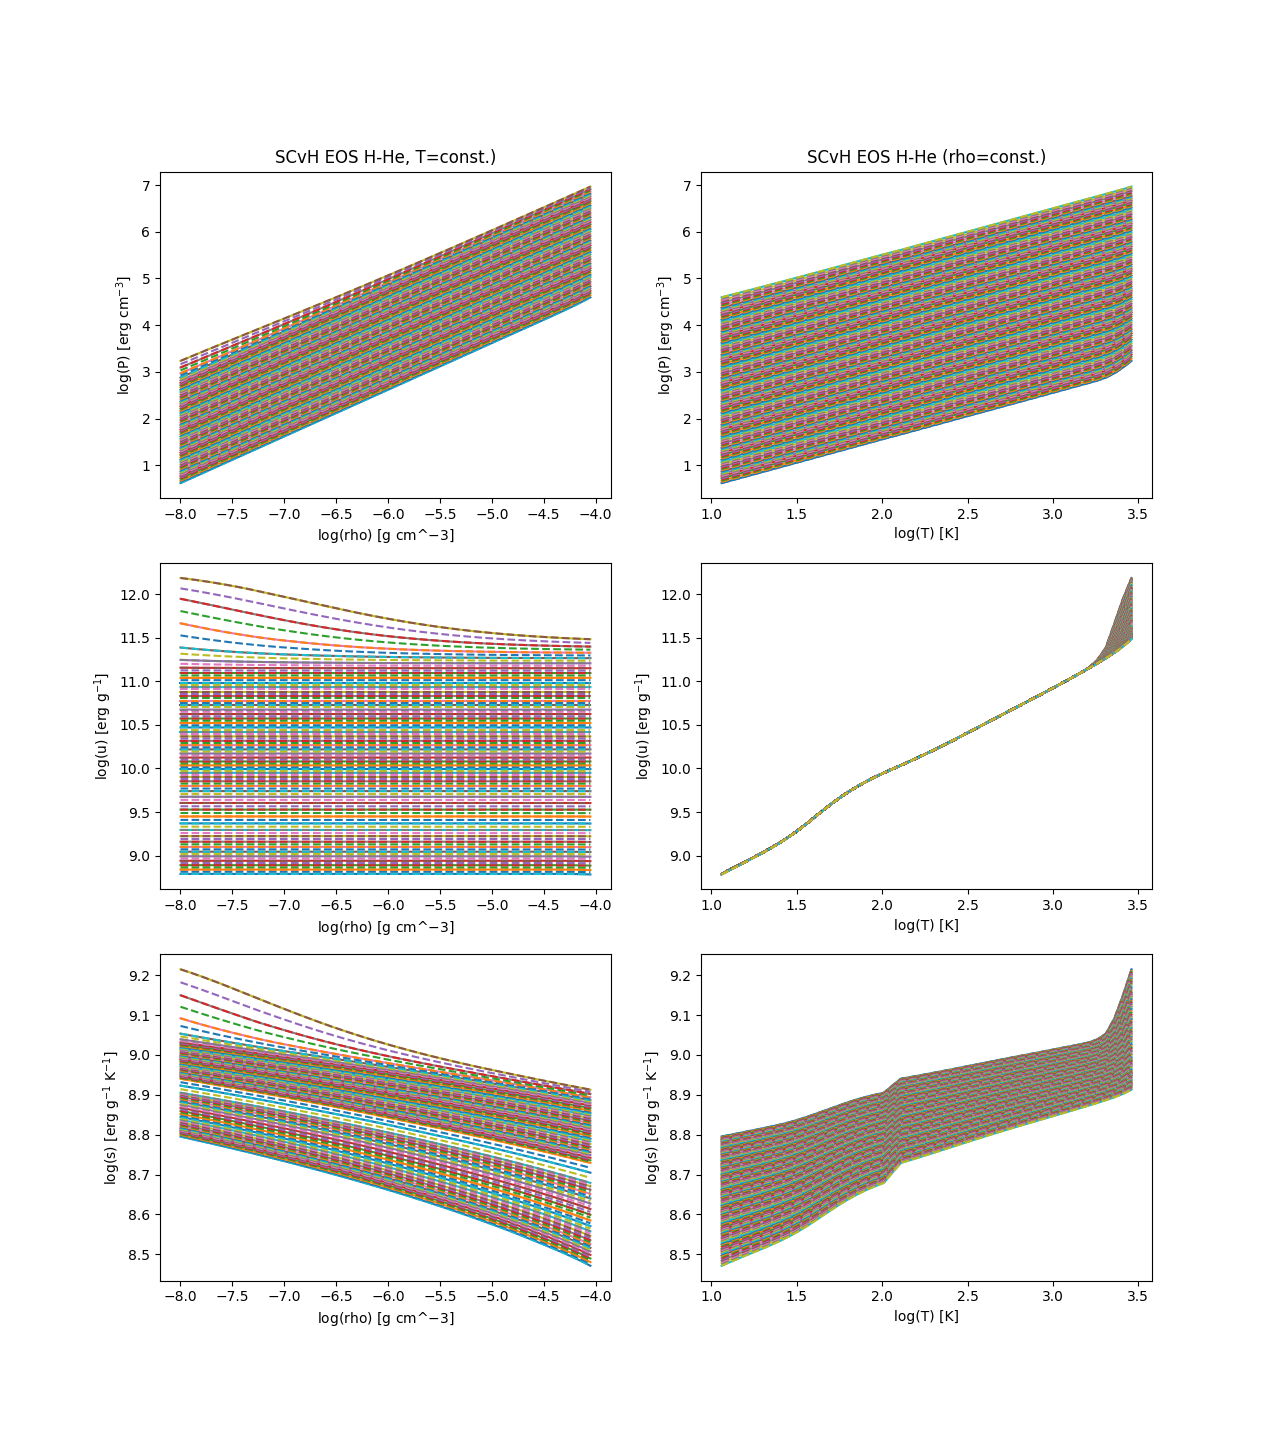

In [7]:
# Plot log(P), log(u) and log(s) of the original table
fig, ax = plt.subplots(3, 2)

x, y = fig.get_size_inches()

fig.set_size_inches(2*x, 3*y)

# P(rho, T=const)
ax[0][0].set_prop_cycle(None)

for i in range(0, nT, nSkipT):
    ax[0][0].plot(logrho_table, logP[i,:], '-')

for i in range(0, nT_int, nSkipT):
    ax[0][0].plot(logrho_int, logP_int[i,:], '--')
    
ax[0][0].set(xlabel="log(rho) [g cm^${-3}$]", ylabel="log(P) [erg cm$^{-3}$]")
ax[0][0].set(title="SCvH EOS H-He, T=const.)")

# P(rho=const, T)
ax[0][1].set_prop_cycle(None)

for i in range(0, nRho, nSkipRho):
    ax[0][1].plot(logT_table, logP[:,i], '-')

for i in range(0, nRho_int, nSkipRho):
    ax[0][1].plot(logT_int, logP_int[:,i], '--')


ax[0][1].set(xlabel="log(T) [K]", ylabel="log(P) [erg cm$^{-3}$]")
ax[0][1].set(title="SCvH EOS H-He (rho=const.)")

# u(rho, T=const)
ax[1][0].set_prop_cycle(None)

for i in range(0, nT, nSkipT):
    ax[1][0].plot(logrho_table, logu[i,:], '-')

for i in range(0, nT_int, nSkipT):
    ax[1][0].plot(logrho_int, logu_int[i,:], '--')

ax[1][0].set(xlabel="log(rho) [g cm^${-3}$]", ylabel="log(u) [erg g$^{-1}$]")

# u(rho=const, T)
ax[1][1].set_prop_cycle(None)

for i in range(0, nRho, nSkipRho):
    ax[1][1].plot(logT_table, logu[:,i], '-')

for i in range(0, nRho_int, nSkipRho):
    ax[1][1].plot(logT_int, logu_int[:,i], '--')

ax[1][1].set(xlabel="log(T) [K]", ylabel="log(u) [erg g$^{-1}$]")

# s(rho, T=const)
ax[2][0].set_prop_cycle(None)

for i in range(0, nT, nSkipT):
    ax[2][0].plot(logrho_table, logs[i,:], '-')

for i in range(0, nT_int, nSkipT):
    ax[2][0].plot(logrho_int, logs_int[i,:], '--')
    
ax[2][0].set(xlabel="log(rho) [g cm^${-3}$]", ylabel="log(s) [erg g$^{-1}$ K$^{-1}$]")

# s(rho=const, T)
ax[2][1].set_prop_cycle(None)

for i in range(0, nRho, nSkipRho):
    ax[2][1].plot(logT_table, logs[:,i], '-')

for i in range(0, nRho_int, nSkipRho):
    ax[2][1].plot(logT_int, logs_int[:,i], '--')

ax[2][1].set(xlabel="log(T) [K]", ylabel="log(s) [erg g$^{-1}$ K$^{-1}$]")


In [8]:
# Generate interpolation functions
logP_interp = interp.interp2d(logrho_table, logT_table, logP, kind='linear')
logu_interp = interp.interp2d(logrho_table, logT_table, logu, kind='linear')
logs_interp = interp.interp2d(logrho_table, logT_table, logs, kind='linear')

Text(0.5, 1.0, 'Pressure (relative error)')

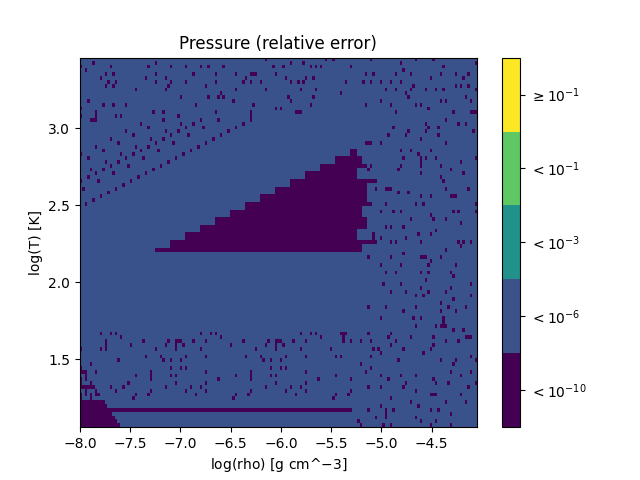

In [17]:
# Calculate the difference
rel_err = np.abs(logP_interp(logrho_int, logT_int)-logP_int)/logP_interp(logrho_int, logT_int)

# Plot the difference
fig, ax = plt.subplots()

mark = np.zeros(rel_err.shape)

mark[np.where(rel_err >=0)] = 4
mark[np.where(rel_err < 1e-1)] = 3
mark[np.where(rel_err < 1e-3)] = 2
mark[np.where(rel_err < 1e-6)] = 1
mark[np.where(rel_err < 1e-10)] = 0

plt.imshow(mark, cmap=plt.cm.get_cmap('viridis', 5), origin='lower', interpolation='none', extent=[logrho_min, logrho_max, logT_min, logT_max], aspect='auto')
cbar = plt.colorbar()

plt.clim(-0.5, 4.5);

cbar.set_ticks(range(0, 5))
cbar.set_ticklabels(["$<10^{-10}$", "$<10^{-6}$", "$<10^{-3}$", "$<10^{-1}$", "$\geq 10^{-1}$"])

plt.xlabel("log(rho) [g cm^${-3}$]")
plt.ylabel("log(T) [K]")
plt.title("Pressure (relative error)")

Text(0.5, 1.0, 'Int. energy (relative error)')

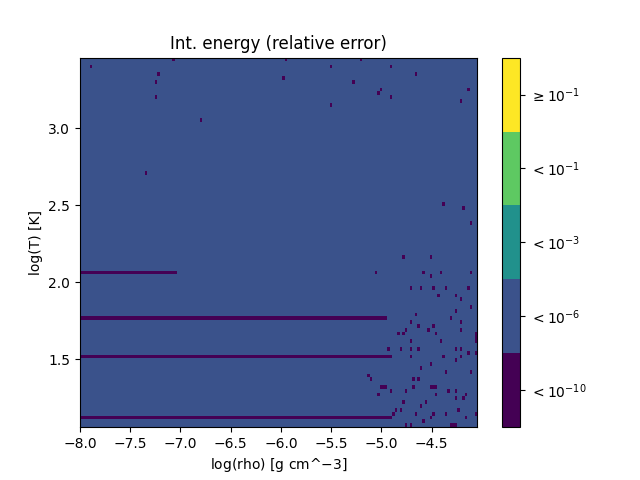

In [21]:
# Calculate the difference
rel_err = np.abs(logu_interp(logrho_int, logT_int)-logu_int)/logu_interp(logrho_int, logT_int)

# Plot the difference
fig, ax = plt.subplots()

mark = np.zeros(rel_err.shape)

mark[np.where(rel_err >=0)] = 4
mark[np.where(rel_err < 1e-1)] = 3
mark[np.where(rel_err < 1e-3)] = 2
mark[np.where(rel_err < 1e-6)] = 1
mark[np.where(rel_err < 1e-10)] = 0

plt.imshow(mark, cmap=plt.cm.get_cmap('viridis', 5), origin='lower', interpolation='none', extent=[logrho_min, logrho_max, logT_min, logT_max], aspect='auto')
cbar = plt.colorbar()

plt.clim(-0.5, 4.5);

cbar.set_ticks(range(0, 5))
cbar.set_ticklabels(["$<10^{-10}$", "$<10^{-6}$", "$<10^{-3}$", "$<10^{-1}$", "$\geq 10^{-1}$"])

plt.xlabel("log(rho) [g cm^${-3}$]")
plt.ylabel("log(T) [K]")
plt.title("Int. energy (relative error)")

Text(0.5, 1.0, 'Entropy (relative error)')

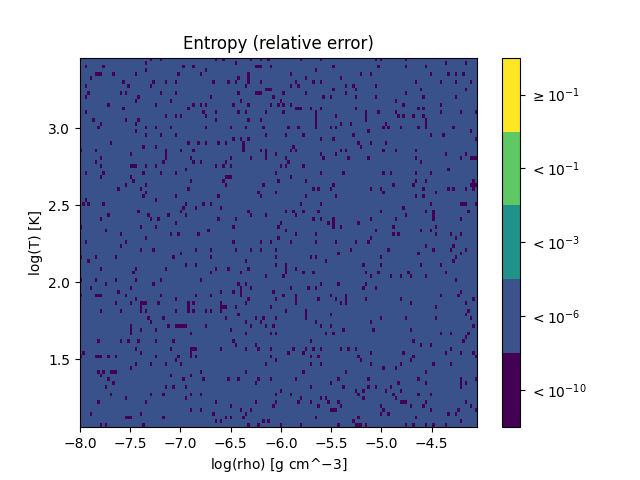

In [22]:
# Calculate the difference
rel_err = np.abs(logs_interp(logrho_int, logT_int)-logs_int)/logs_interp(logrho_int, logT_int)

# Plot the difference
fig, ax = plt.subplots()

mark = np.zeros(rel_err.shape)

mark[np.where(rel_err >=0)] = 4
mark[np.where(rel_err < 1e-1)] = 3
mark[np.where(rel_err < 1e-3)] = 2
mark[np.where(rel_err < 1e-6)] = 1
mark[np.where(rel_err < 1e-10)] = 0

plt.imshow(mark, cmap=plt.cm.get_cmap('viridis', 5), origin='lower', interpolation='none', extent=[logrho_min, logrho_max, logT_min, logT_max], aspect='auto')
cbar = plt.colorbar()

plt.clim(-0.5, 4.5);

cbar.set_ticks(range(0, 5))
cbar.set_ticklabels(["$<10^{-10}$", "$<10^{-6}$", "$<10^{-3}$", "$<10^{-1}$", "$\geq 10^{-1}$"])

plt.xlabel("log(rho) [g cm^${-3}$]")
plt.ylabel("log(T) [K]")
plt.title("Entropy (relative error)")